In [5]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import itertools
from collections import defaultdict
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib.ticker as ticker
import csv
import sys

module_dir = "/Users/monclalab1/Documents/scripts/"
sys.path.append(module_dir)

import balticEdited as bt


In [ ]:
list_of_genes = ["ha", "pb1", "pb2","pa","mp","np","na","ns"]

def load_tree(gene):
    path = f'auspice/{gene}.json'
    mytree, mymeta = bt.loadJSON(path)
    return(mytree)


Tree height: 20.196000
Tree length: 382.484000
annotations present

Numbers of objects in tree: 851 (391 nodes and 460 leaves)



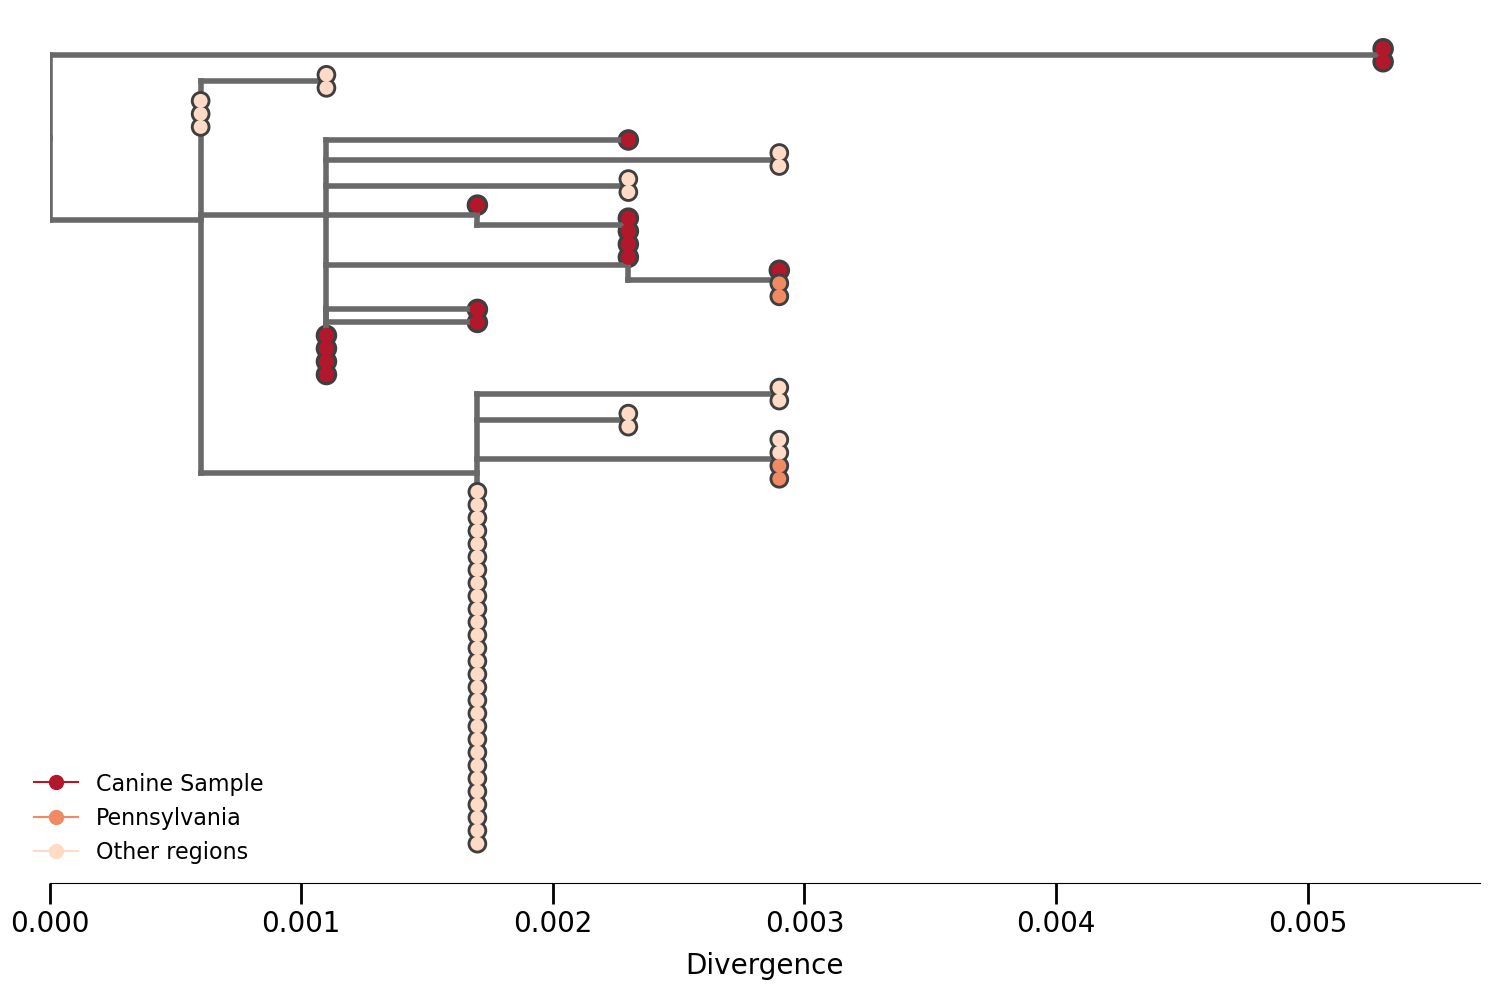

In [46]:
# plotting code for HA divergence phylogeny of subsetted canine h3n2 tree where the root is the 
# mrca for the canine samples

# manual annotations for vaccinated samples and border patrol dogs done in powerpoint/illustrator

# i also rotated it manually

canine_samples = ['C1', 'C2', 'C4', 'C5', 'C6', 'C7',
                  'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19']

# for reference
vaccinated = ['C1', 'C5', 'C11', 'C17']

def s_func_o1(k):
    if k.traits["name"] in canine_samples:
        return 120
    else:
        return 0


def s_func_o2(k):
    if k.traits["name"] in canine_samples:
        return 0
    else:
        return 100


def subtree_coloring(k):
    """
    Assigns colors:
      - red if in canine_samples
      - orange if region is Pennsylvania
      - light red otherwise
    """
    name = k.traits["name"]
    if name in canine_samples:
        return '#b2182b'

    region = name.split("/")[2]  # e.g., A/canine/Texas/... → "Texas"
    if region == "Pennsylvania":
        return '#ef8a62'
    
    else:
        return '#fddbc7' # other US


mytree = load_tree("ha")

for k in mytree.Objects:
    if k.traits["name"] == "NODE_0000404":

        target_subtree = mytree.subtree(k)

        fig, ax = plt.subplots(figsize=(15, 10))
        
        # mrca of all canine samples becomes root
        root_div = target_subtree.root.traits['divergence']
        x_attr = lambda k: 0 if k == target_subtree.root else k.traits['divergence'] - root_div
        
        color_by = lambda k: subtree_coloring(k)

        target_subtree.plotTree(ax, x_attr=x_attr, colour='dimgrey', width=4)
        
        # canine samples
        target_subtree.plotPoints(ax,
                                  x_attr=x_attr,
                                  size=s_func_o1,
                                  colour=color_by,
                                  outline_colour='#3f3f3f',
                                  zorder=2,
                                  marker='o')
        
        # all other samples
        target_subtree.plotPoints(ax,
                                  x_attr=x_attr,
                                  size=s_func_o2,
                                  colour=color_by,
                                  outline_colour='#3f3f3f',
                                  zorder=3,
                                  marker='o',
                                 )

        han_list = [
        mlines.Line2D([], [], color='#b2182b', marker='o',
                      markerfacecolor='#b2182b', label='Canine Sample', markersize=10),
        mlines.Line2D([], [], color='#ef8a62', marker='o',
                      markerfacecolor='#ef8a62', label='Pennsylvania', markersize=10),
        mlines.Line2D([], [], color='#fddbc7', marker='o',
                      markerfacecolor='#fddbc7', label='Other regions', markersize=10),
        ]

        ax.legend(handles=han_list,
                  markerfirst=True,
                  frameon=False,
                  loc=3,
                  bbox_to_anchor=(-0.025, 0),
                  fontsize=16)

        min_x_value = min(x_attr(k) for k in target_subtree.Objects)
        ax.set_xlim(left=max(0, min_x_value))
        ax.set_yticks([])
        ax.set_yticklabels([])
        [ax.spines[loc].set_visible(False)
         for loc in ax.spines if loc not in ['bottom']]
        ax.tick_params(axis='x', labelsize=20,
                       size=15, width=2, color='black')
        ax.set_xlabel('Divergence', fontsize=20, labelpad=10, color='black')
        fig.tight_layout()
        plt.show()



Tree height: 20.196000
Tree length: 382.484000
annotations present

Numbers of objects in tree: 851 (391 nodes and 460 leaves)



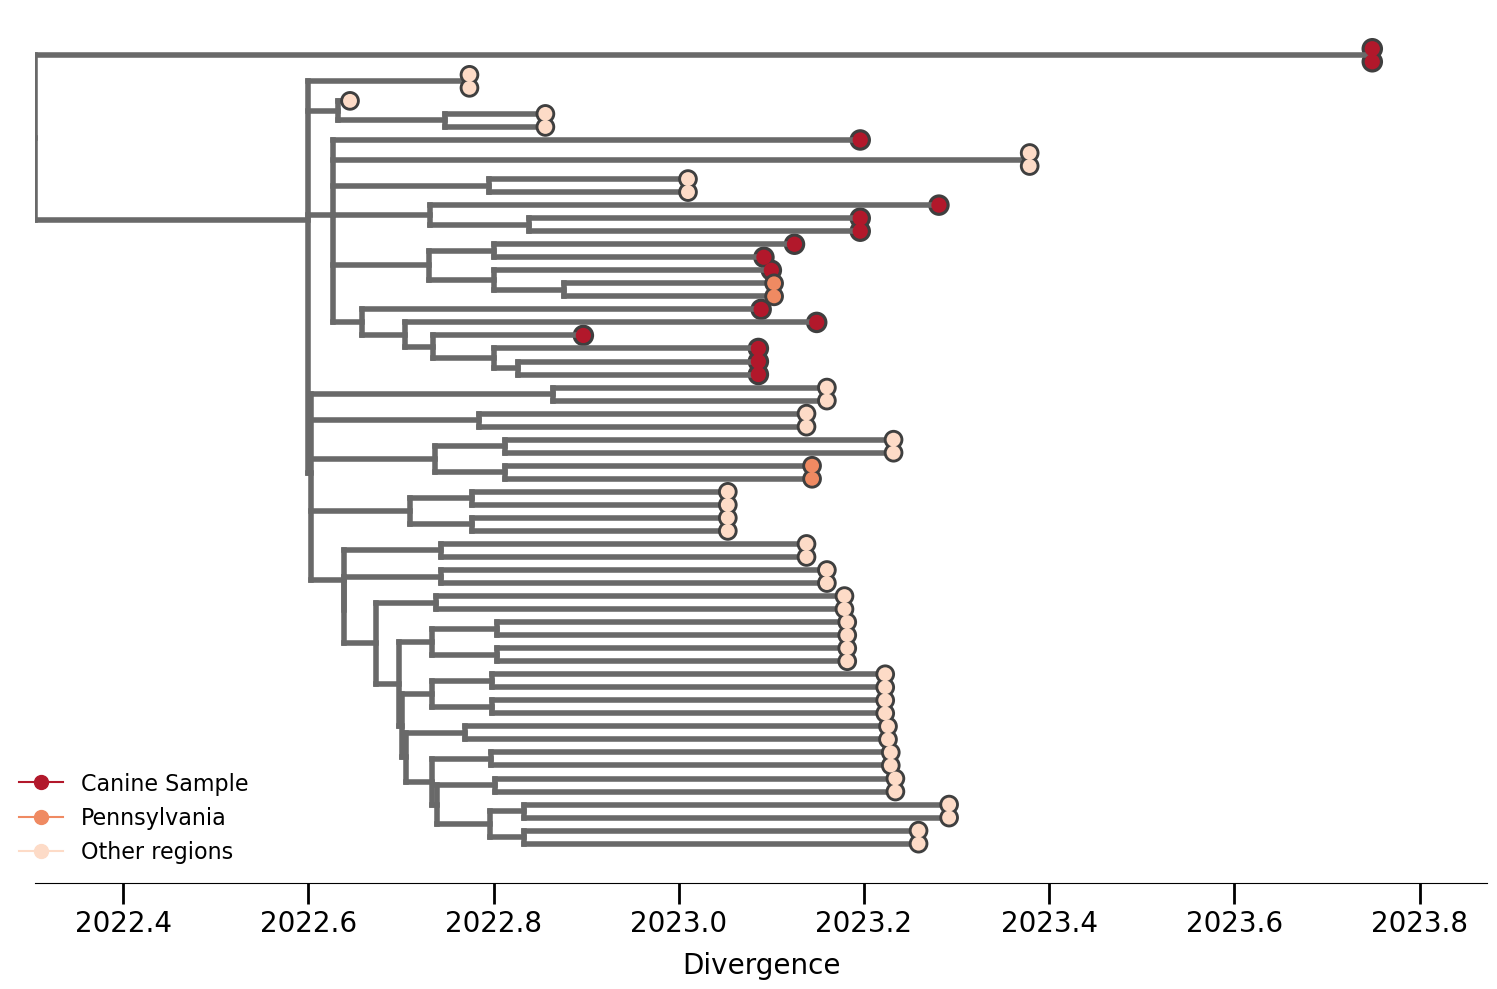

In [48]:
# plotting code for HA time-resolved phylogeny of subsetted canine h3n2 tree where the root is the 
# mrca for the canine samples

# manual annotations for vaccinated samples and border patrol dogs done in powerpoint/illustrator

# i also rotated it manually

canine_samples = ['C1', 'C2', 'C4', 'C5', 'C6', 'C7',
                  'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19']

# for reference
vaccinated = ['C1', 'C5', 'C11', 'C17']

def s_func_o1(k):
    if k.traits["name"] in canine_samples:
        return 120
    else:
        return 0


def s_func_o2(k):
    if k.traits["name"] in canine_samples:
        return 0
    else:
        return 100


def subtree_coloring(k):
    """
    Assigns colors:
      - red if in canine_samples
      - orange if region is Pennsylvania
      - light red otherwise
    """
    name = k.traits["name"]
    if name in canine_samples:
        return '#b2182b'

    region = name.split("/")[2]  # e.g., A/canine/Texas/... → "Texas"
    if region == "Pennsylvania":
        return '#ef8a62'
    
    else:
        return '#fddbc7' # other US


mytree = load_tree("ha")

for k in mytree.Objects:
    if k.traits["name"] == "NODE_0000404":
        
        # mrca of all canine samples becomes root
        
        target_subtree = mytree.subtree(k)

        fig, ax = plt.subplots(figsize=(15, 10))
    
        x_attr = lambda k: k.absoluteTime
        
        color_by = lambda k: subtree_coloring(k)

        target_subtree.plotTree(ax, x_attr=x_attr, colour='dimgrey', width=4)
        
        # canine samples
        target_subtree.plotPoints(ax,
                                  x_attr=x_attr,
                                  size=s_func_o1,
                                  colour=color_by,
                                  outline_colour='#3f3f3f',
                                  zorder=2,
                                  marker='o')
        
        # all other samples
        target_subtree.plotPoints(ax,
                                  x_attr=x_attr,
                                  size=s_func_o2,
                                  colour=color_by,
                                  outline_colour='#3f3f3f',
                                  zorder=3,
                                  marker='o',
                                 )

        han_list = [
        mlines.Line2D([], [], color='#b2182b', marker='o',
                      markerfacecolor='#b2182b', label='Canine Sample', markersize=10),
        mlines.Line2D([], [], color='#ef8a62', marker='o',
                      markerfacecolor='#ef8a62', label='Pennsylvania', markersize=10),
        mlines.Line2D([], [], color='#fddbc7', marker='o',
                      markerfacecolor='#fddbc7', label='Other regions', markersize=10),
        ]

        ax.legend(handles=han_list,
                  markerfirst=True,
                  frameon=False,
                  loc=3,
                  bbox_to_anchor=(-0.025, 0),
                  fontsize=16)

        min_x_value = min(x_attr(k) for k in target_subtree.Objects)
        ax.set_xlim(left=max(0, min_x_value))
        ax.set_yticks([])
        ax.set_yticklabels([])
        [ax.spines[loc].set_visible(False)
         for loc in ax.spines if loc not in ['bottom']]
        ax.tick_params(axis='x', labelsize=20,
                       size=15, width=2, color='black')
        ax.set_xlabel('Divergence', fontsize=20, labelpad=10, color='black')
        fig.tight_layout()
        plt.show()
